# Digits Classifier

We'll be working with a built in dataset in sklearn which is the hand-written digits dataset from UCI. The dataset is tabular so each row is an image. The columns indicate to the location of the pixels while the row values are pixel values. To visualize an image we can reshape the dataset. 

Lets load in the data and take a look.

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math                                     
from scipy import stats
import sklearn
from sklearn import datasets


In [2]:
data = sklearn.datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
#we have a dictionary it seems so lets look
df = pd.DataFrame(data['data'], columns= data['feature_names'])
df = pd.concat([df, pd.DataFrame(data['target'], columns = ['target'])], axis = 1)

data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [1]:
# reshape the data
first_image = df.iloc[0]
first_image = first_image.drop('target', axis=0)
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

NameError: name 'df' is not defined

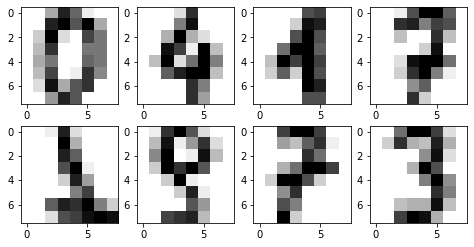

In [5]:
def plot_images(indicies):
    plt.figure(figsize = (8,4))
    for i,num in zip(range(1,len(indicies) +1),indicies):
        first_image = df.iloc[num]
        first_image = first_image.drop('target', axis=0)
        np_image = first_image.values
        np_image = np_image.reshape(8,8)
        plt.subplot(2,4,i)
        plt.imshow(np_image,cmap = 'gray_r')
        
indicies = [0, 100, 200,300, 1000, 1100, 1200, 1300]
plot_images(indicies)

# Train Test Pipeline
Now we can split the dataset and create a train and test set then run some models.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = \
train_test_split(df.drop('target', axis = 1),
                 df['target'],
                 test_size =0.2,
                 stratify = df['target'],
                 random_state = 1)
    
def cross_val(model, xtrain, ytrain, kfolds = 10):
    scores = cross_val_score(model,
                             X = X_train,
                             y = y_train,
                             cv = kfolds,
                             n_jobs = 1)
    print('CV accuracy {:.3f} +/- {:.3f}'.format(np.mean(scores),
                                               np.std(scores)))
    return(np.mean(scores))

cross_val(model = KNeighborsClassifier(), xtrain = X_train,
          ytrain = y_train, kfolds = 10)
    

CV accuracy 0.984 +/- 0.007


0.9840083527583529

# KNN simple accuracy KFold

We can look at the simple accuracy of the model using a KNN classifier. We will plot the average accuracy in the cross validation set versus the number of folds.

CV accuracy 0.974 +/- 0.004
CV accuracy 0.981 +/- 0.004
CV accuracy 0.982 +/- 0.006
CV accuracy 0.984 +/- 0.004
CV accuracy 0.985 +/- 0.006
CV accuracy 0.985 +/- 0.005
CV accuracy 0.984 +/- 0.007
CV accuracy 0.984 +/- 0.005
CV accuracy 0.984 +/- 0.007


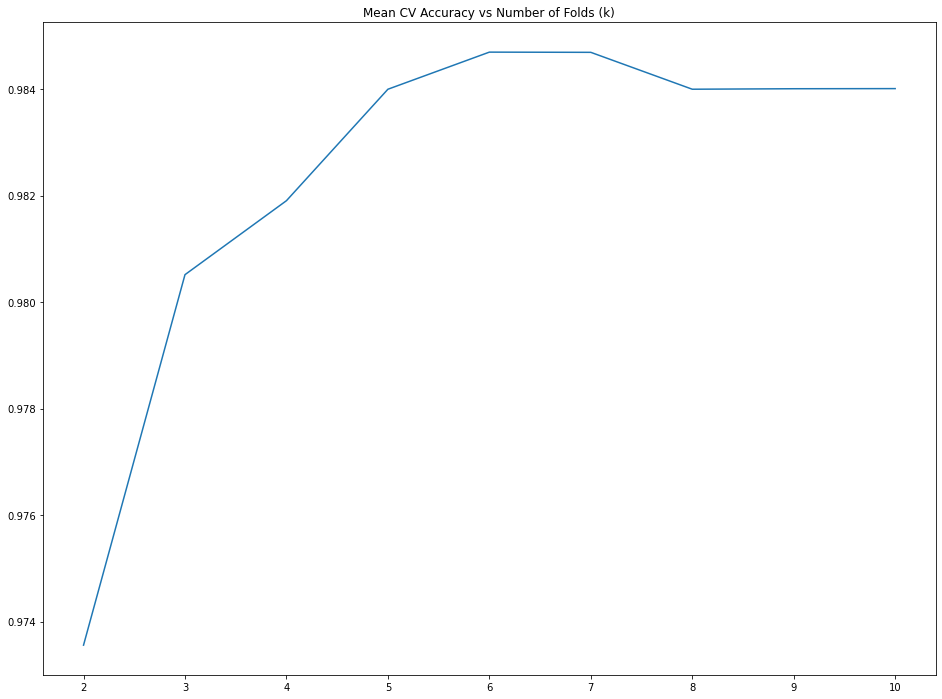

In [40]:
kvals = list(range(2,11))
avg_scores = []
for k in kvals:
    avg_scores.append(cross_val(model = KNeighborsClassifier(), xtrain = X_train,
          ytrain = y_train, kfolds = k))

plt.figure(figsize= (16,12))
plt.title("Mean CV Accuracy vs Number of Folds (k)")
plt.plot(kvals, avg_scores)

# Test set performance
Lets find the accuracy score on the reserved test set.

In [42]:
from sklearn.metrics import accuracy_score

def test_acc(model, xtrain,ytrain, xtest,ytest):
    model.fit(xtrain,ytrain)
    preds = model.predict(xtest)
    score = accuracy_score(preds, ytest)
    print("Score on Test set: {:3f}".format(score))
    return(score)
    
test_acc(model = KNeighborsClassifier(), xtrain = X_train,
          ytrain = y_train, xtest = X_test, ytest = y_test)

Score on Test set: 0.988889


# NN Development

Lets explore a few neural network models using the MLPClassifer from sklearn.

We will look at several different values of the number of neurons and hidden layers.

In [49]:
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


nn_1L = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

for neuron in nn_1L:
    model = MLPClassifier(neuron)
    cross_val(model, xtrain = X_train, ytrain = y_train, kfolds = 10)
    test_acc(model = model, xtrain = X_train,
          ytrain = y_train, xtest = X_test, ytest = y_test)
    


CV accuracy 0.903 +/- 0.047
Score on Test set: 0.911111
CV accuracy 0.958 +/- 0.019
Score on Test set: 0.977778
CV accuracy 0.965 +/- 0.012
Score on Test set: 0.975000
CV accuracy 0.967 +/- 0.016
Score on Test set: 0.975000
CV accuracy 0.981 +/- 0.012
Score on Test set: 0.975000
CV accuracy 0.981 +/- 0.010
Score on Test set: 0.977778


When working with a single layer everything above 8 nodes seems to do roughly the same.

In [51]:
nn_2L = [
    (8,8),
    (16,16),
    (32,32),
    (64,64),
    (128,128)
]

for neuron in nn_2L:
    model = MLPClassifier(neuron)
    cross_val(model, xtrain = X_train, ytrain = y_train, kfolds = 10)
    test_acc(model = model, xtrain = X_train,
          ytrain = y_train, xtest = X_test, ytest = y_test)

CV accuracy 0.913 +/- 0.021
Score on Test set: 0.916667
CV accuracy 0.955 +/- 0.018
Score on Test set: 0.947222
CV accuracy 0.968 +/- 0.015
Score on Test set: 0.963889
CV accuracy 0.974 +/- 0.013
Score on Test set: 0.975000
CV accuracy 0.976 +/- 0.013
Score on Test set: 0.977778


In [68]:
nn_3L = [
    (8,8,8),
    (64,64,64),
    (128,128,128)
]

for neuron in nn_3L:
    model = MLPClassifier(neuron)
    cross_val(model, xtrain = X_train, ytrain = y_train, kfolds = 10)
    test_acc(model = model, xtrain = X_train,
          ytrain = y_train, xtest = X_test, ytest = y_test)

CV accuracy 0.909 +/- 0.032
Score on Test set: 0.922222
CV accuracy 0.978 +/- 0.012
Score on Test set: 0.966667
CV accuracy 0.978 +/- 0.012
Score on Test set: 0.975000


In [65]:
# A better cross val function. This will also return the training and test scores allowing interpretation of bias/variance.
# from sklearn.model_selection import cross_validate

# def cross_val2(model, xtrain, ytrain, kfolds = 10):
#     scores = cross_validate(model,
#                              X = X_train,
#                              y = y_train,
#                              cv = kfolds,
#                              n_jobs = 1,
#                             return_train_score = True,
#                            scoring = 'accuracy')
#     print('Train accuracy {:.3f} +/- {:.3f}'.format(np.mean(scores['train_score']),
#                                                np.std(scores['train_score'])))
#     print('CV accuracy {:.3f} +/- {:.3f}'.format(np.mean(scores['test_score']),
#                                                np.std(scores['test_score'])))
#     return(scores)





In [66]:
test = cross_val2(model = KNeighborsClassifier(), xtrain = X_train,
          ytrain = y_train, kfolds = 10)

Train accuracy 0.991 +/- 0.001
CV accuracy 0.984 +/- 0.007


# Results

Neural networks did okay, however they were outperformed in this particular task by KNN classifiers in both speed and accuracy.